In [27]:
import pandas as pd

movies_df = pd.read_csv("C:/Users/charn/OneDrive/movies/movies.csv")


In [28]:
movies_df['year'] = movies_df['title'].str.extract('(\d{4})')


In [29]:
movies_by_year = movies_df.groupby('year').size()


In [31]:
previous_value = 100
current_value = 150
percentage_change = (current_value - previous_value) / previous_value * 100



In [32]:
percentage_change = (current_value - previous_value) / previous_value * 100


In [33]:
percentage_changes = {}
previous_value = None

for year, value in movies_by_year.items():
    if previous_value is not None:
        percentage_change = (value - previous_value) / previous_value * 100
        percentage_changes[year] = percentage_change
    
    previous_value = value


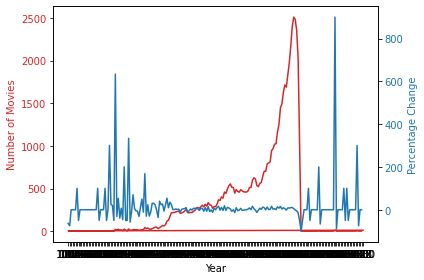

In [34]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color=color)
ax1.plot(movies_by_year.index, movies_by_year.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Percentage Change', color=color)
ax2.plot(list(percentage_changes.keys()), list(percentage_changes.values()), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [43]:
import pandas as pd

movies_df = pd.read_csv("C:/Users/charn/OneDrive/movies/movies.csv")
ratings_chunks = pd.read_csv("C:/Users/charn/OneDrive/movies/ratings.csv", chunksize=1000000)

for ratings_df in ratings_chunks:
    # merge ratings data with movies data
    ratings_with_movies = pd.merge(ratings_df, movies_df, on='movieId')

    # calculate mean rating for each movie
    movie_mean_ratings = ratings_with_movies.groupby('title')['rating'].mean()

    # output top-rated movies
    top_movies = movie_mean_ratings.nlargest(10)
    print(top_movies)



title
10 Questions for the Dalai Lama (2006)                  5.0
14+ (2015)                                              5.0
2019: After the Fall of New York (1983)                 5.0
3 Bad Men (1926)                                        5.0
A Brother (2018)                                        5.0
A Song of Lisbon (1933)                                 5.0
A Year Along the Abandoned Road                         5.0
Absurdistan (2008)                                      5.0
Adele Hasn't Had Her Dinner Yet (1978)                  5.0
Adventures of Picasso, The (Picassos äventyr) (1978)    5.0
Name: rating, dtype: float64
title
'R Xmas (2001)                            5.0
13B (2009)                                5.0
24 City (Er shi si cheng ji) (2008)       5.0
3 on a Couch (Three on a Couch) (1966)    5.0
5ive Days to Midnight (2004)              5.0
6 Days (2017)                             5.0
911 Nightmare (2016)                      5.0
A Country Wedding (2015)             

title
A Boyfriend for My Wife (2008)                                      5.0
A Charlie Brown Thanksgiving (1973)                                 5.0
A Time to Live, a Time to Die (1985)                                5.0
A.K. (1985)                                                         5.0
Ace Attorney (Gyakuten saiban) (2012)                               5.0
Acrimony (2018)                                                     5.0
Adore (2013)                                                        5.0
Adventurer, The (1917)                                              5.0
Afternoon of a Torturer, The (Dupa-amiaza unui tortionar) (2001)    5.0
Aftershock (Tangshan dadizhen) (2010)                               5.0
Name: rating, dtype: float64
title
'Tis the Season for Love (2015)                5.0
.hack Liminality In the Case of Kyoko Tohno    5.0
.hack Liminality In the Case of Yuki Aihara    5.0
.hack Liminality: In the Case of Mai Minase    5.0
12 Dates of Christmas (2011)       

In [ ]:
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')


In [ ]:
genres_df = movies_ratings_df['genres'].str.get_dummies(sep='|')
# Count the number of movies in each genre
genre_counts = movies_df['genres'].str.split('|', expand=True).stack().value_counts()

# Plot a bar chart of the genre counts
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

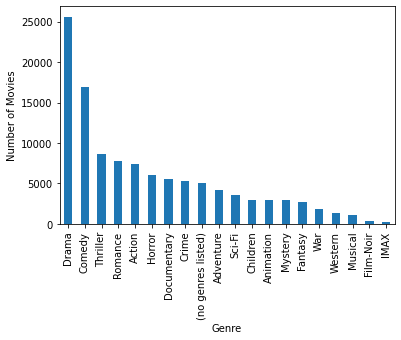

In [39]:
# Count the number of movies in each genre
genres_count = movies_df['genres'].str.split('|', expand=True).stack().value_counts()

# Plot the count of movies in each genre
import matplotlib.pyplot as plt

genres_count.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


In [49]:
import pandas as pd

movies_df = pd.read_csv("C:/Users/charn/OneDrive/movies/movies.csv")
ratings_chunks = pd.read_csv("C:/Users/charn/OneDrive/movies/ratings.csv", chunksize=1000000)

# Initialize an empty dictionary to store the total ratings for each movie
total_ratings = {}

for ratings_df in ratings_chunks:
    # Merge movies and ratings dataframes on movieId column
    merged_df = pd.merge(movies_df, ratings_df, on='movieId')
    
    # Calculate the total ratings for each movie
    groupby_movie = merged_df.groupby('title')
    movie_ratings = groupby_movie['rating'].sum()
    
    # Add the movie ratings to the dictionary
    for title, rating_sum in movie_ratings.items():
        if title not in total_ratings:
            total_ratings[title] = rating_sum
        else:
            total_ratings[title] += rating_sum

# Convert the dictionary to a dataframe and sort by total ratings
total_ratings_df = pd.DataFrame.from_dict(total_ratings, orient='index', columns=['total_ratings'])
total_ratings_df = total_ratings_df.sort_values(by='total_ratings', ascending=False)

# Print the top 10 movies by total ratings
print(total_ratings_df.head(10))


                                                    total_ratings
Shawshank Redemption, The (1994)                         359627.0
Pulp Fiction (1994)                                      333739.0
Forrest Gump (1994)                                      329876.5
Silence of the Lambs, The (1991)                         307726.5
Matrix, The (1999)                                       301895.0
Star Wars: Episode IV - A New Hope (1977)                283127.0
Schindler's List (1993)                                  256600.5
Fight Club (1999)                                        248510.5
Star Wars: Episode V - The Empire Strikes Back ...       237711.0
Usual Suspects, The (1995)                               237207.5


In [62]:
import pandas as pd

movies_df = pd.read_csv("C:/Users/charn/OneDrive/movies/movies.csv")
ratings_chunks = pd.read_csv("C:/Users/charn/OneDrive/movies/ratings.csv", chunksize=1000000)

# merge movies and ratings dataframes on movieId column
ratings_df = pd.concat(ratings_chunks, ignore_index=True)
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

print(merged_df.head())




ParserError: Error tokenizing data. C error: out of memory

In [63]:
import pandas as pd

movies_df = pd.read_csv("C:/Users/charn/OneDrive/movies/movies.csv")
ratings_df = pd.read_csv("C:/Users/charn/OneDrive/movies/ratings.csv")

# merge movies and ratings dataframes on movieId column
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# calculate average rating for each movie
avg_ratings = merged_df.groupby('title')['rating'].mean()

# filter for movies with an average rating of 4.5 or higher
high_rated_movies = avg_ratings[avg_ratings >= 4.5]

# extract genres column from movies dataframe
genres_col = movies_df['genres']

# split genres column into separate genres and create a new dataframe
genres_df = genres_col.str.split('|', expand=True)

# add title column to genres dataframe
genres_df['title'] = movies_df['title']

# merge genres and high rated movies dataframes on title column
merged_genres = pd.merge(genres_df, high_rated_movies, on='title')

# calculate most common genre among highly rated movies
most_common_genre = merged_genres.iloc[:, :-1].stack().value_counts().idxmax()

print(most_common_genre)


ParserError: Error tokenizing data. C error: out of memory